### <center> Логистическая регрессия

In [ ]:
from sklearn.datasets import load_boston, load_iris
import seaborn as sns
import pandas as pd
import numpy as np

Несмотря на наличие слова "регрессия" в названии, логистическая регрессия на самом деле является широко используемым бинарным классификатором (т. е. вектор целей может принимать только два значения). В логистической регрессии линейная модель (например, b0 + b1*х) включается в логистическую (так называемую сигмоидальную) функцию:
$$\frac{1}{1 + e^{-x}}$$

In [ ]:
np.linspace(-15, 15, 100)

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


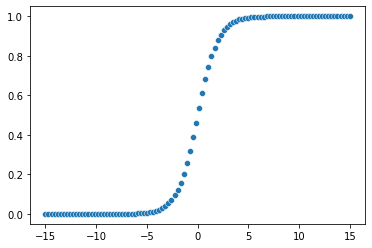

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-15, 15, 100)
y = sigmoid(x)
sns.scatterplot(x,y);

таким образом, что:
$$P(y_i = 1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$$
где
- Р(уi: 1|X ) — вероятность, что целевое значение i-го наблюдения **у**, является классом 1;
- X — тренировочные данные; 
- b0 и b1 — параметры, которые необходимо обучить;
- е — эйлерово число.

Эффект логистической функции заключается в ограничении значения результата функции диапазоном между 0 и 1, чтобы его можно было интерпретировать как вероятность. Если Р(yi = 1|X) больше 0.5, то предсказывается класс 1, в противном случае — класс 0.

В библиотеке scikit-leam можно обучить логистическую регрессионную модель с
помощью класса LogisticRegression. После тренировки модели ее можно использо вать для предсказания класса новых наблюдений

**Посмотрим влияние коэффициентов линейной регресии на вывод логистической регрессии**

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

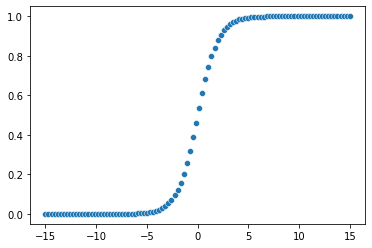

In [3]:
def linreg(x, b0=5, b1=0.5):
    return b0 + b1 * x

x = np.linspace(-15, 15, 100)
y = sigmoid(linreg(x, b0=0, b1=1))
sns.scatterplot(x,y)

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

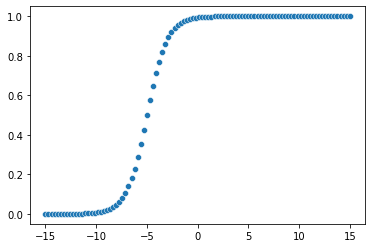

In [4]:
y = sigmoid(linreg(x, b0=5, b1=1))
sns.scatterplot(x,y)

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

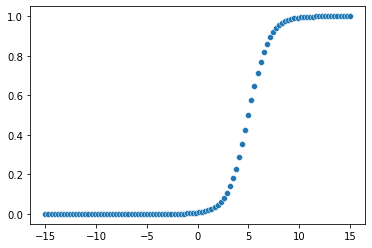

In [5]:
y = sigmoid(linreg(x, b0=-5, b1=1))
sns.scatterplot(x,y)

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

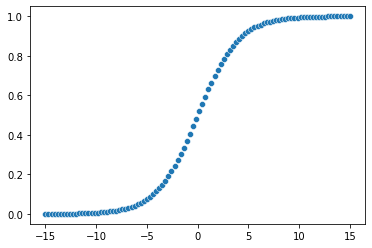

In [6]:
y = sigmoid(linreg(x, 0, 0.5))
sns.scatterplot(x,y)

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

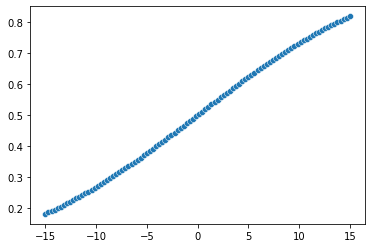

In [7]:
y = sigmoid(linreg(x, 0, 0.1))
sns.scatterplot(x,y)

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

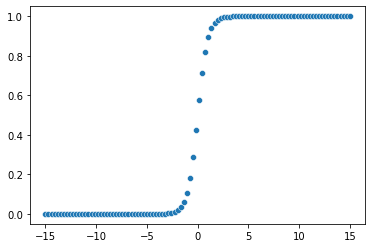

In [8]:
y = sigmoid(linreg(x, 0, 2.0))
sns.scatterplot(x,y)

### Данные

In [187]:
iris = load_iris()
c = [name[:-5] for name in iris.feature_names]
iris_data = pd.DataFrame(iris.data, columns=c)
iris_data['target'] = iris.target
iris_data['name'] = iris_data.target.apply(lambda x : iris.target_names[x])
iris_data.head()

,sepal length,sepal width,petal length,petal width,target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Посмотрим на количество объектов в каждом классе.

In [27]:
iris_data.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

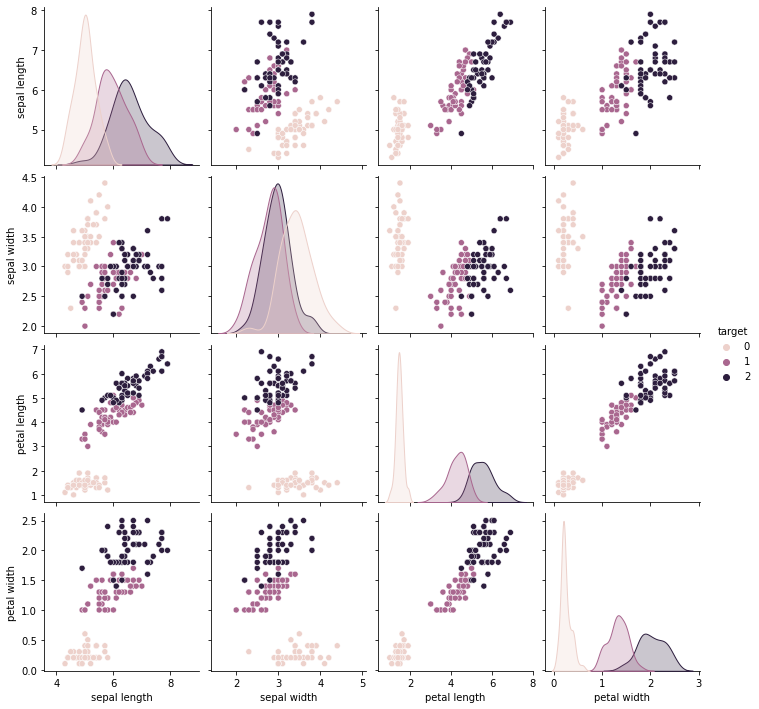

In [116]:
sns.pairplot(iris_data, hue="target")

In [188]:
df=iris_data[iris_data['target'].isin([1,2])]
# df = iris_data.copy()

### Классификатор

Достанем отдельно признаки (фичи), по которым бутем предстказывать вид ириса и метку класса

In [189]:
x = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df.target

Чтобы проверять качество модели, разобьем все данные на обучающую и тестовую выборку. Для этого будем использовать специальную функцию **train_test_split** из библиотеки **sklearn**. 

Разбиение выборки на обучающую и тестовую происходит случайным образом. Параметр **test_size** указывает, какой процент выборки использовать как тестовую. Параметр **random_state** позволяет зафиксировать случайное разбиение. Это позволит нам каждый раз получать одинаковые обуччабщую и тестовую выборки

In [190]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [193]:
x_train.shape

(75, 4)

Строим модель

In [194]:
 # создаем объект модели
log_reg = LogisticRegression()
# обучаем модель та обучающих выборках 
model = log_reg.fit(x_train, y_train) 
# получаем предсказаные метки класса для обучающих данных
pred_train = model.predict(x_train) 
pred_proba = model.predict_proba(x_train)

In [195]:
pred_train

array([1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2])

In [151]:
pred_proba

array([[0.90516058, 0.09483942],
       [0.88859098, 0.11140902],
       [0.27714547, 0.72285453],
       [0.95359536, 0.04640464],
       [0.00470858, 0.99529142],
       [0.91191567, 0.08808433],
       [0.92409608, 0.07590392],
       [0.01465094, 0.98534906],
       [0.81257122, 0.18742878],
       [0.02305663, 0.97694337],
       [0.8532085 , 0.1467915 ],
       [0.14631833, 0.85368167],
       [0.10146304, 0.89853696],
       [0.82764652, 0.17235348],
       [0.8073459 , 0.1926541 ],
       [0.94626696, 0.05373304],
       [0.79966108, 0.20033892],
       [0.99494133, 0.00505867],
       [0.12371128, 0.87628872],
       [0.47136708, 0.52863292],
       [0.97436427, 0.02563573],
       [0.02105142, 0.97894858],
       [0.89735546, 0.10264454],
       [0.08825148, 0.91174852],
       [0.75982069, 0.24017931],
       [0.92744079, 0.07255921],
       [0.94158021, 0.05841979],
       [0.96993436, 0.03006564],
       [0.95124544, 0.04875456],
       [0.85387532, 0.14612468],
       [0.

In [198]:
# коэф-т b0 и коэф-ты при фичах
model.intercept_, log_reg.coef_ 

(array([-13.86040113]),
 array([[-0.24339196, -0.63407972,  2.77126486,  2.14805837]]))

Модель обучена, теперь надо проверить ее качество. Попробуем посчитать метрику **accuracy** - долю правильно предсказанных классов

In [196]:
check_df = pd.DataFrame()
check_df['target'] = y_train
check_df['pred'] = pred_train
check_df['correct'] = check_df['target'] == check_df['pred']
check_df['correct'] = check_df['correct'].astype(int)

correct_predictions = check_df['correct'].sum()

accuracy = correct_predictions / x_train.shape[0]
accuracy

0.9733333333333334

Метрики качества уже реализованы в модуле **metrics** библиотеки  **sklearn**. Сравним результаты 

In [197]:
from sklearn.metrics import  accuracy_score
# accuracy - доля правильно определенных классов
print('Accuracy: ', metrics.accuracy_score(y_train, pred_train))

Accuracy:  0.9733333333333334


Теперь проверим, насколько хорошо модель покажет себя на тестовых данных. Применим обученную модель для предсказания класса на этих данных

In [125]:
# получаем предсказаные метки класса для обучающих данных
pred_test = model.predict(x_test) 
print('Accuracy: ', metrics.accuracy_score(y_test, pred_test))

Accuracy:  1.0
